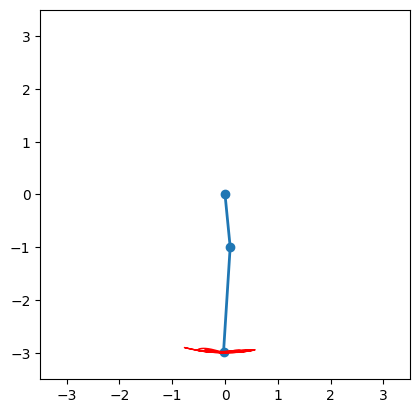

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def metodo_euler(theta1_0, theta2_0, theta1_punto_0, theta2_punto_0, m1, m2, l1, l2, g, b, dt, num_pasos):
    # Arrays para almacenar los valores de theta1, theta2, theta1_punto y theta2_punto
    theta1 = np.zeros(num_pasos)
    theta2 = np.zeros(num_pasos)
    theta1_punto = np.zeros(num_pasos)
    theta2_punto = np.zeros(num_pasos)

    # Asignar valores iniciales
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1_punto[0] = theta1_punto_0
    theta2_punto[0] = theta2_punto_0

    # Iterar para cada paso de tiempo
    for i in range(1, num_pasos):
        # Calcular las derivadas en el paso de tiempo actual
        theta1_punto_punto = (-m2*l2/(l1*(m1+m2)) * np.cos(theta1[i-1] - theta2[i-1]) * theta2_punto[i-1]**2
                             - g/l1 * np.sin(theta1[i-1]) + b/(l1*(m1+m2)) * theta1[i-1])
        theta2_punto_punto = (-l1/l2 * np.cos(theta1[i-1] - theta2[i-1]) * theta1_punto[i-1]**2
                             - g/l2 * np.sin(theta2[i-1]) + b/(m2*l2) * theta2[i-1])

        # Actualizar los valores en el paso de tiempo actual utilizando el método de Euler
        theta1[i] = theta1[i-1] + theta1_punto[i-1] * dt
        theta2[i] = theta2[i-1] + theta2_punto[i-1] * dt
        theta1_punto[i] = theta1_punto[i-1] + theta1_punto_punto * dt
        theta2_punto[i] = theta2_punto[i-1] + theta2_punto_punto * dt

    return theta1, theta2

# Parámetros del sistema
m1 = 1.0
m2 = 2.0
l1 = 1.0
l2 = 2.0
g = 9.81
b = -2.5

# Valores iniciales
theta1_0 = 0.1
theta2_0 = 0.2
theta1_punto_0 = 0.0
theta2_punto_0 = 0.0

# Parámetros de integración
dt = 0.01  # Paso de tiempo
num_pasos = 1000  # Número de pasos de tiempo

# Obtener solución numérica
theta1, theta2 = metodo_euler(theta1_0, theta2_0, theta1_punto_0, theta2_punto_0, m1, m2, l1, l2, g, b, dt, num_pasos)

# Generar animación
fig, ax = plt.subplots()

# Posiciones de los péndulos
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

# Dibujar líneas de los péndulos y el camino del segundo péndulo
line, = ax.plot([], [], 'o-', lw=2)
path, = ax.plot([], [], 'r-', lw=1)

# Actualizar las líneas en cada paso de tiempo
def update(i):
    ax.clear()

    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], 'o-', lw=2)
    ax.plot(x2[:i+1], y2[:i+1], 'r-', lw=1)
    
    ax.set_xlim(-l1-l2-0.5, l1+l2+0.5)
    ax.set_ylim(-l1-l2-0.5, l1+l2+0.5)

    ax.set_aspect('equal', 'box')

ani = animation.FuncAnimation(fig, update, frames=num_pasos, interval=dt*1000, repeat=False)
ani.save('pendulo.mp4', writer='ffmpeg', fps=60)
plt.show()